In [1]:
import pandas as pd
import ast
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from week 13 in YY's Data Vis Class
import spacy
import wordcloud
import en_core_web_sm
# nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')
from collections import Counter

# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


In [2]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis


elist_filename = "../data/editorials-1.jl"
tags_filename = "../data/by_article_110219.jl"
full_filename = "../data/by_article_fulltext_112919-2.jl"

tag_df = imp.init_df(tags_filename, "tags")
edi_df = imp.init_df(elist_filename, "editorial")
full_df = imp.init_df(full_filename, "full")

print("done")


done


After scraping from Science Careers at sciencecmag.com/careers, there are still different numbers of article entries from the different methods of scraping. I don't like, but I'm not sure how to fix it. However, the tags file and the full file are only 20 away from each other, which could be close enough; these were scraped by following the links on the list and scraping from each article's individual page, which I think could be more reliable. Editorials was scraped only from the pages of links to the articles, which may be less reliable. Furthermore, the full dataset contains the tags list, so I may just start using full only. 

In [3]:
print("editorials dataset")
print(len(edi_df))
print("tags dataset")
print(len(tag_df))
print("full dataset")
print(len(full_df))


editorials dataset
6312
tags dataset
6136
full dataset
6111


The plot of the number of posts each year from the start of the careers section to the present day shows a large spike in the number of posts around 2002 reaching a height of about 650, and a smaller bump around 2014 reaching about 350.

year  date_seq  month_seq  n_posts_author    n
0  1996        99         22             118    2
1  1997       929         59             551    3
2  1998     19536        925            3623   30
3  1999    284239      12046           16591  283
4  2000    622908      24801           21245  452


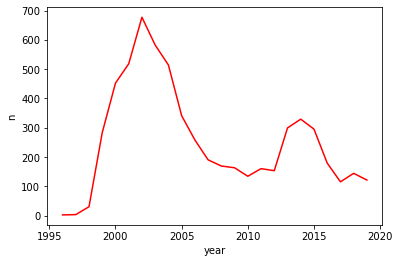

In [4]:
full_vis = vis.prep_per(full_df, group_by = "year", color = "red", test = True)

#sns.lineplot(x = "year", y = "n", color = "red", data = full_vis)

However, of these articles, the number of posts each author varies radically, as around 0.8 of the authors have written 1 or 2 posts, while several authors in the long tail have written many, many posts. For this reason, I want to see some authors as columnists, who regularly write and submit articles, while most authors are 1 or 2 time contributors. 

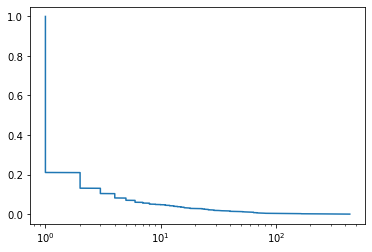

In [5]:
authors = full_df["authors"].value_counts()
authors_df = pd.DataFrame(authors)
authors_df.head(10)

plt.xscale(value = "log")
plt.plot(np.flip(np.sort(authors_df.authors)), np.linspace(0, 1, len(authors_df.authors), endpoint=False))

In the following plot, the red line continues to show the total number of posts per year, the green and blue lines repectively show the columnists and 1-2 time authors. While the both columnists and noncolumnists seem to have contributed to the first spike, the second spike seems to be explained mostly by the increase in the number of posts written by columnists. There are consistently fewer posts by noncolumnists per year, typically under 20 per year. but the number of posts authored by columnists is relatively higher. 

d:\Box Sync\editorials\scripts\desc_vis.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["n"] = 1


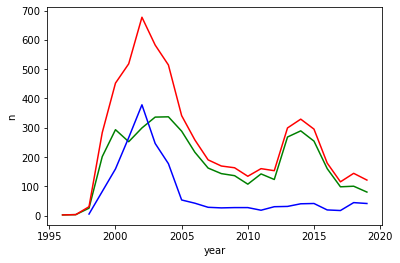

In [6]:
column = vis.dual_per(full_df, split = "column2", test = False) # group_by = "avg_month", 

column1 = column[0][0]
column2 = column[1][0]

column_df0 = vis.prep_per(column1, group_by = "year", color = "red", test = False)
column_df1 = vis.prep_per(column2, group_by = "year", color = "blue", test = False)

sns.lineplot(x = "year", y = "n", color = "green", data = column_df0) 
sns.lineplot(x = "year", y = "n", color = "blue", data = column_df1)
sns.lineplot(x = "year", y = "n", color = "red", data = full_vis) 

# Tags Work

Each article has been marked with a number of topical tags for searchability on the science careers website. These are their stories. 

There is a total of 409 tags. 
An average of 3 something tags are applied to each post

In [7]:
# should work directly after importing and processing
tags_dict_id = tgs.tag_incidence(full_df, lifespan=True, id_col_tag=True, binary=True, dict_return=True)
tags_df_id =  tgs.tag_incidence(full_df, lifespan = True, id_col_tag=True, binary=True, dict_return=False)
year_inc = tgs.inc_per_year(tags_dict_id)

# total tags
print(len(tags_dict_id))

#tags without columns
print(len([key for key in tags_dict_id.keys() if tags_dict_id[key]["overall"]["col_tag"] == "no"]))

# average tags per post
print(np.average(tags_df_id.groupby(by = "headline").size()))

416
368
3.8042943779708245


top tags per year, not including tags that distinguished partiular columns.

In [8]:
for i in range(1996,2019):
    # print(year_inc[year_inc["year"]== i].sort_values(by = ["incidence"], ascending=False))
    print(year_inc[year_inc["year"]== i].nlargest(round(len(year_inc[year_inc["year"]== i])/8), columns="incidence"),"\n")

year     tag  incidence
44  1996  advice          2

    year     tag  incidence
45  1997  advice          3

     year       tag  incidence
33   1998    advice         28
249  1998  americas         28

     year       tag  incidence
238  1999  americas        221
30   1999    advice        130

     year                      tag  incidence
235  2000                 americas        279
1    2000  issues and perspectives        212

     year       tag  incidence
242  2001  americas        296
26   2001    advice        256

     year         tag  incidence
236  2002    americas        355
55   2002  job market        277
31   2002      advice        258

     year       tag  incidence
237  2003  americas        300
266  2003    europe        258

     year         tag  incidence
244  2004    americas        306
52   2004  job market        211

     year         tag  incidence
243  2005    americas        245
47   2005  job market        143
223  2005    academic        127

     year

The column tags that appeared each year.

In [9]:
coltags_dict_id = tgs.tag_incidence(full_df, lifespan=True, id_col_tag=True, binary=True, dict_return=True)
coltags_year_inc = tgs.inc_per_year(coltags_dict_id, columns="yes")

for i in range(1996,2019):
    # print(year_inc[year_inc["year"]== i].sort_values(by = ["incidence"], ascending=False))
    print(coltags_year_inc[coltags_year_inc["year"]== i].sort_values(by="incidence"),"\n")

year         tag  incidence
0  1996  tooling up          2

   year         tag  incidence
1  1997  tooling up          3

    year         tag  incidence
52  1998     classic          1
2   1998  tooling up         23

   year         tag  incidence
3  1999  tooling up         22

   year         tag  incidence
4  2000  tooling up         21

   year         tag  incidence
5  2001  tooling up         10

   year         tag  incidence
6  2002  tooling up         20

    year                tag  incidence
76  2003  taken for granted          6
7   2003         tooling up         17

    year                tag  incidence
30  2004  from the archives          2
8   2004         tooling up         11
77  2004  taken for granted         11

     year                tag  incidence
107  2005       mind matters          1
9    2005         tooling up         11
78   2005  taken for granted         12

     year                tag  incidence
108  2006       mind matters          1
10   2006   